,Rows,Columns,Columns List
0,10,15,"show_id, type, title, director, cast, country,..."


,missing_count
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


,count
type,
Movie,6
TV Show,4


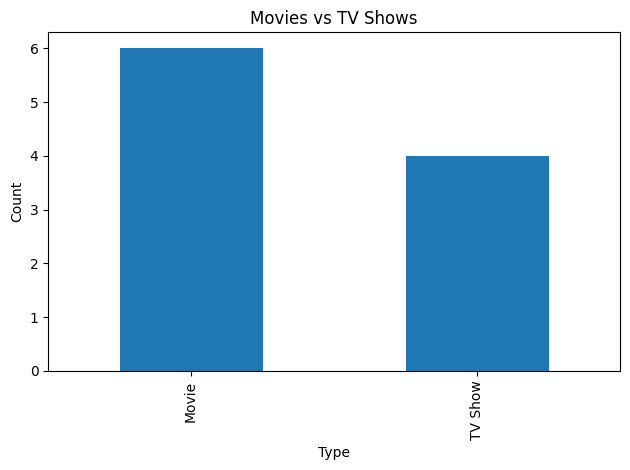

,count
rating,
TV-14,2
PG-13,2
PG,2
TV-Y7,2
TV-MA,1
R,1


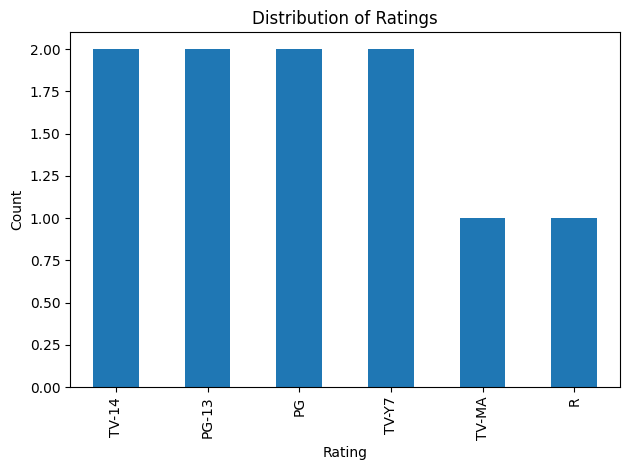

,count
country,
India,4
United States,3
United Kingdom,2
Japan,2
France,1


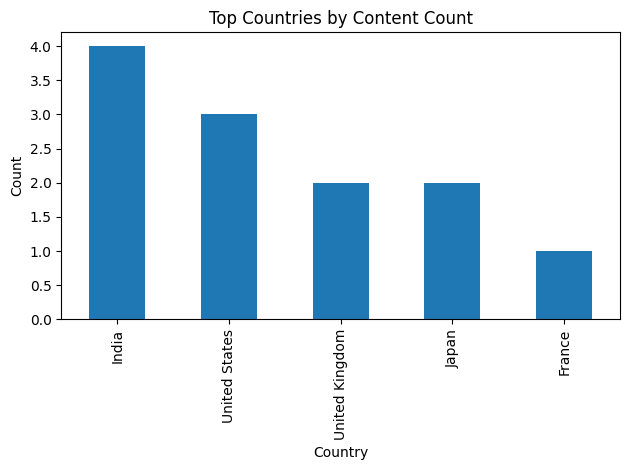

,count
release_year,
2014,1
2015,1
2016,1
2017,1
2018,1
2019,1
2020,1
2021,1
2022,1


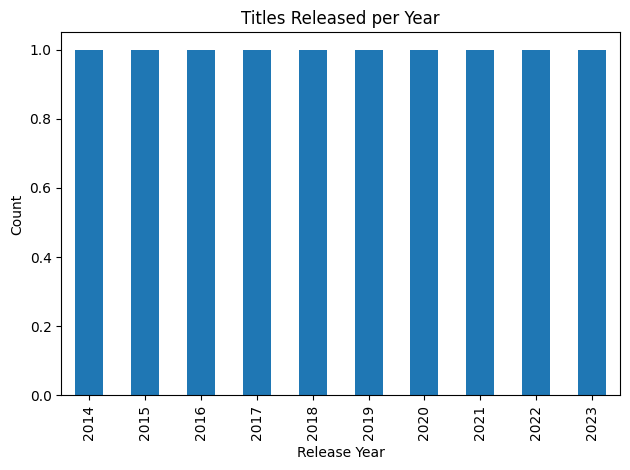

,count
added_year,
2016,1
2017,1
2018,1
2019,1
2020,2
2021,2
2022,1
2023,1


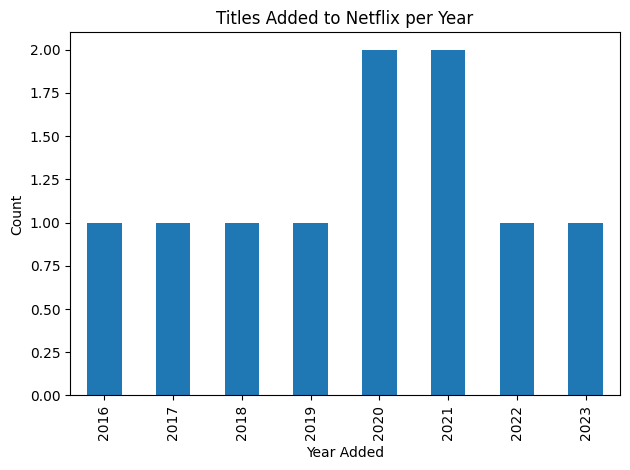

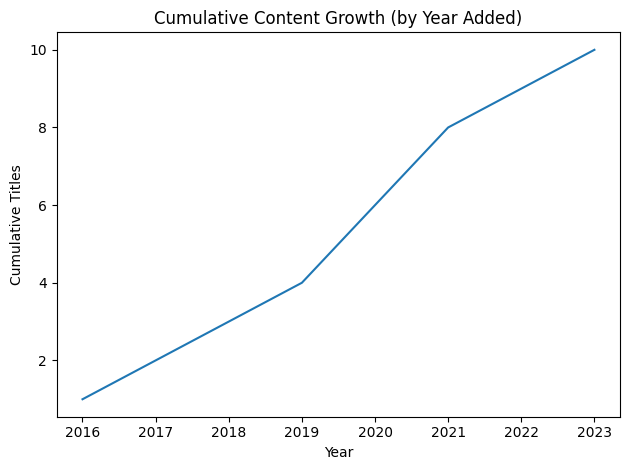

,minutes
0,90
2,110
3,95
5,87
7,105
8,99


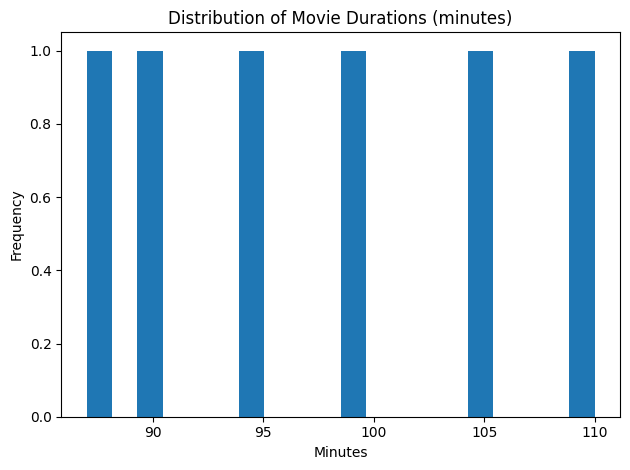

,count
seasons,
1,2
2,1
3,1


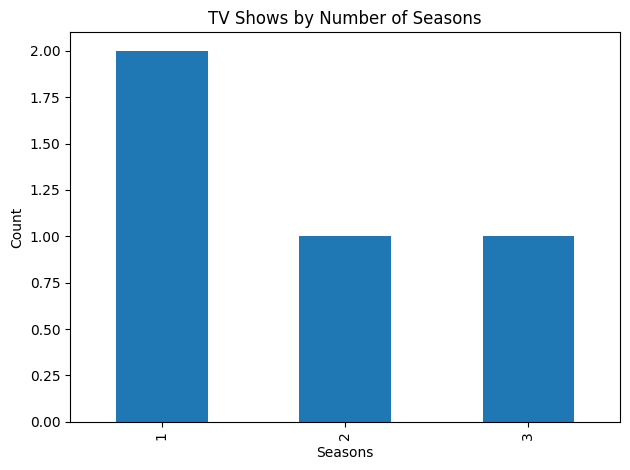

,count
listed_in,
Dramas,4
TV Dramas,3
International,2
Comedies,2
Action & Adventure,2
Anime Series,2
Children & Family,1


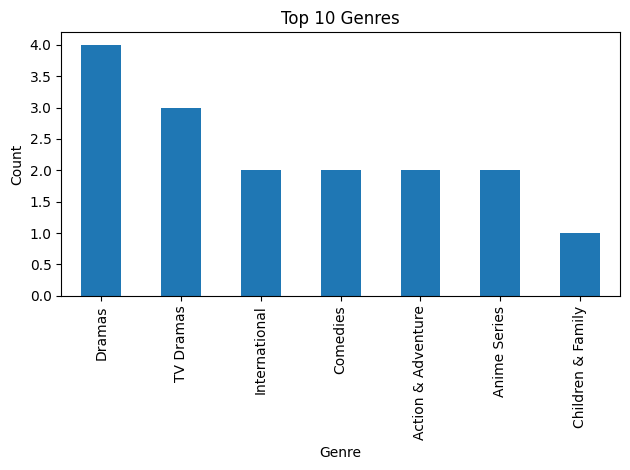

,count
director,
Jane Smith,3
John Doe,2
None,2
Anne Lee,2
Tom Jay,1


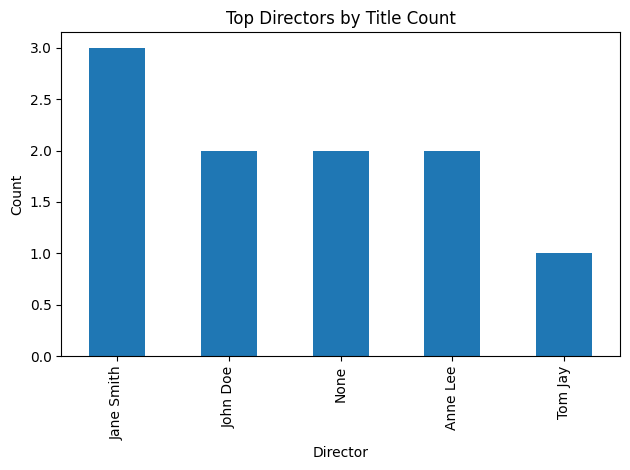

,count
cast,
A,3
B,2
E,2
C,1
D,1
F,1
H,1
I,1
J,1


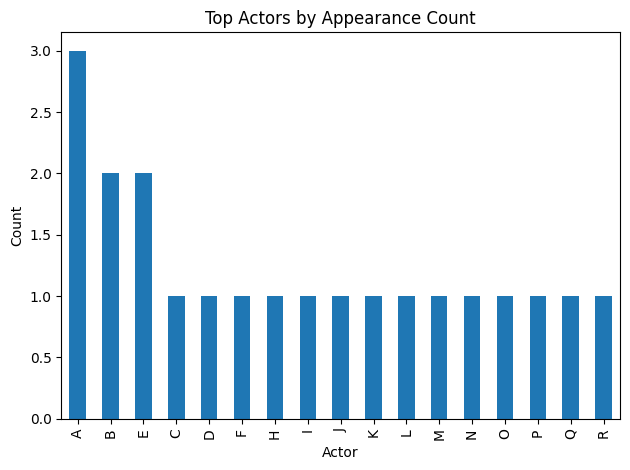

,word,count
0,drama,4
1,action,2
2,anime,2
3,gripping,1
4,friendship,1
5,betrayal,1
6,witty,1
7,set,1
8,london,1
9,inspiring,1


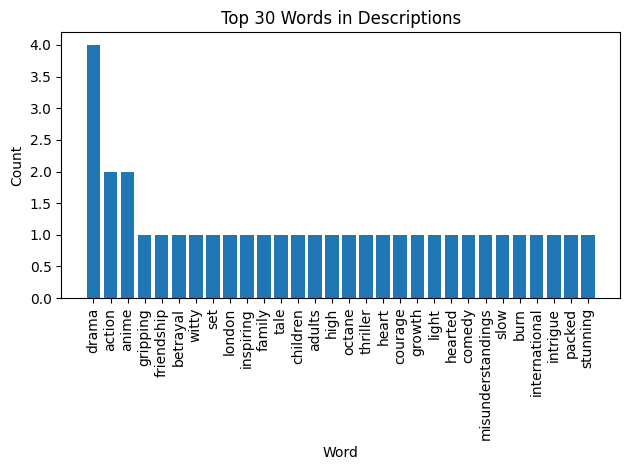

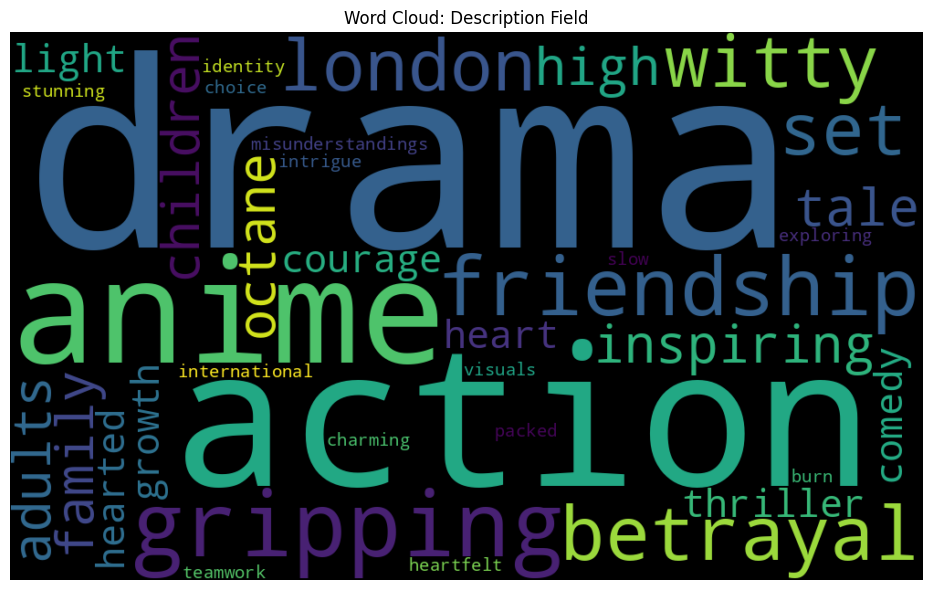

,count
January,1
February,1
March,1
May,1
June,1
July,1
August,1
September,1
November,1
December,1


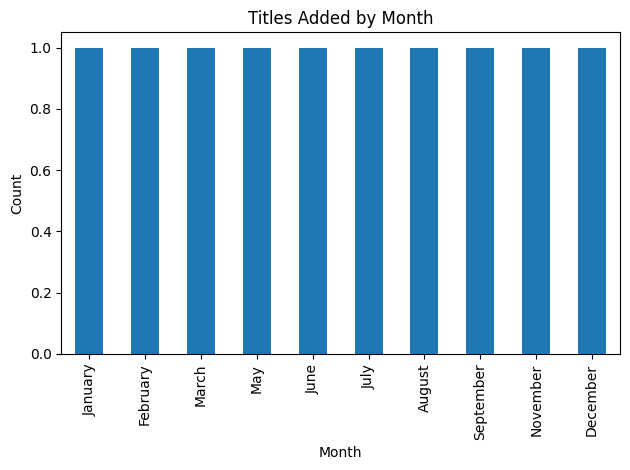

type,country,Movie,TV Show
0,India,3,1
1,United States,2,1
2,United Kingdom,1,1
3,France,1,0
4,Japan,0,2


<Figure size 640x480 with 0 Axes>

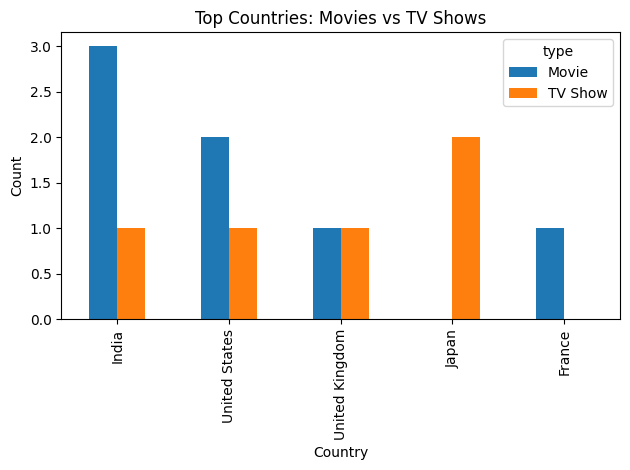

,type,rating,show_id
0,Movie,PG,2
1,Movie,PG-13,2
2,Movie,R,1
3,Movie,TV-MA,1
4,TV Show,TV-14,2
5,TV Show,TV-Y7,2


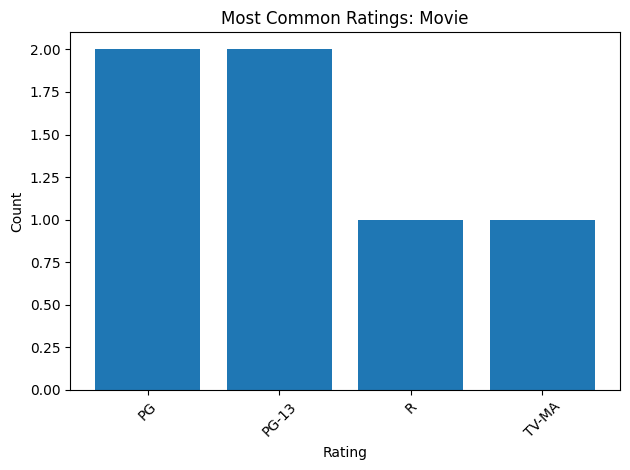

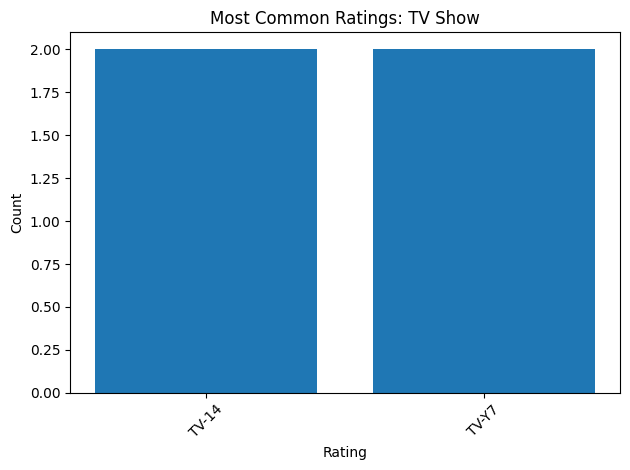

,title,type,release_year,country,rating
9,Kappa,TV Show,2014,Japan,TV-Y7


,title,type,release_year,country,rating
8,Iota,Movie,2023,United Kingdom,PG-13


,Genre,Action & Adventure,Anime Series,Children & Family,Comedies,Dramas,International,TV Dramas
0,Action & Adventure,2,0,0,0,1,0,0
1,Anime Series,0,2,0,0,0,0,1
2,Children & Family,0,0,1,0,1,0,0
3,Comedies,0,0,0,2,0,0,1
4,Dramas,1,0,1,0,4,1,0
5,International,0,0,0,0,1,2,1
6,TV Dramas,0,1,0,1,0,1,3


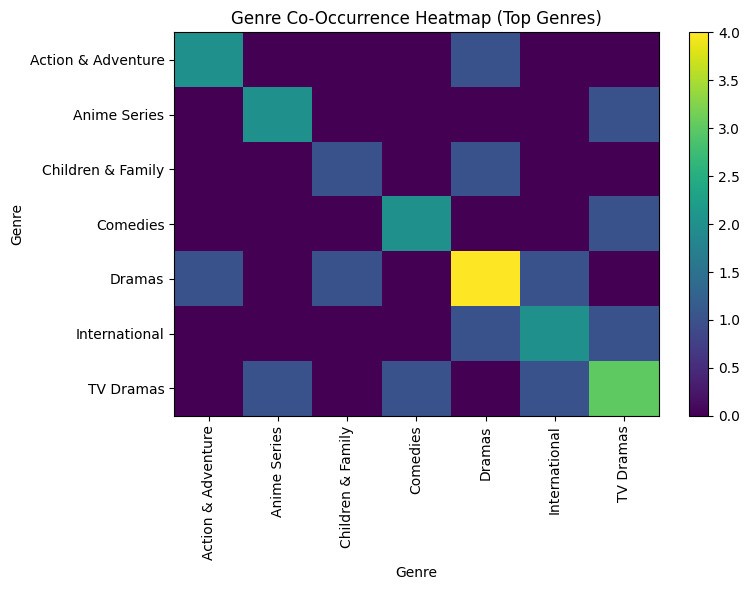

Saved to: C:\Users\TCS\Downloads\netflix_eda_summary.xlsx


,Data source,Total titles,Movies,TV Shows,Earliest release year,Latest release year
0,Mock dataset generated (upload the Kaggle file...,10,6,4,2014,2023


Report saved to: C:\Users\TCS\Downloads\netflix_eda_summary.xlsx
Mock dataset generated (upload the Kaggle file to replace this).


In [10]:
# This notebook answers all questions in the REC AD23532 – Principles of Data Science: Ex6 (Netflix EDA).
# It expects a file named 'netflix_titles.csv' placed in /mnt/data/ .
# If it isn't found, the code will generate a tiny mock dataset just so the
# pipeline runs, but please upload the real Kaggle dataset for 100% accurate
# results.

import os
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from datetime import datetime
from IPython.display import display # Use standard display

# ---------- 0) Load dataset ----------
csv_path = r"C:\Users\TCS\Downloads\netflix_titles.csv"

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    source_note = "Loaded real dataset: /mnt/data/netflix_titles.csv"
else:
    # Minimal mock data to demonstrate the pipeline (PLEASE REPLACE WITH REAL DATA)
    data = {
        "show_id": [1,2,3,4,5,6,7,8,9,10],
        "type": ["Movie","TV Show","Movie","Movie","TV Show","Movie","TV Show","Movie","Movie","TV Show"],
        "title": ["Alpha","Beta","Gamma","Delta","Epsilon","Zeta","Eta","Theta","Iota","Kappa"],
        "director": ["John Doe","Jane Smith","John Doe",None,"Jane Smith","Anne Lee","Tom Jay","Anne Lee",None,"Jane Smith"],
        "cast": ["A, B, C","A, D","E, F", "B, E","A, H", "I, J", "K, L", "M, N", "O, P","Q, R"],
        "country": ["United States, India","United Kingdom","India","United States","Japan, India","France","United States","India","United Kingdom","Japan"],
        "date_added": ["January 10, 2020","March 5, 2019","July 2, 2021","December 25, 2020","June 1, 2018","August 9, 2021","September 1, 2017","November 11, 2022","May 3, 2023","February 20, 2016"],
        "release_year": [2019,2018,2021,2015,2017,2020,2016,2022,2023,2014],
        "rating": ["TV-MA","TV-14","PG-13","R","TV-Y7","PG","TV-14","PG","PG-13","TV-Y7"],
        "duration": ["90 min","2 Seasons","110 min","95 min","1 Season","87 min","3 Seasons","105 min","99 min","1 Season"],
        "listed_in": ["Dramas, International","Comedies, TV Dramas","Children & Family, Dramas",
                      "Action & Adventure, Dramas","Anime Series","Comedies",
                      "TV Dramas, International","Action & Adventure","Dramas",
                      "Anime Series, TV Dramas"],
        "description": [
            "A gripping drama about friendship and betrayal.",
            "A witty TV drama set in London.",
            "An inspiring family tale for children and adults.",
            "High-octane action thriller with heart.",
            "An anime series about courage and growth.",
            "A light-hearted comedy film about misunderstandings.",
            "A slow-burn TV drama with international intrigue.",
            "Action-packed film with stunning visuals.",
            "A heartfelt drama exploring identity and choice.",
            "A charming anime series about teamwork."
        ]
    }
    df = pd.DataFrame(data)
    source_note = "Mock dataset generated (upload the Kaggle file to replace this)."

# Clean whitespace in string columns
for col in ["director","cast","country","listed_in","rating","type","title","description"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Ensure date_added parsed
if "date_added" in df.columns:
    df["date_added_parsed"] = pd.to_datetime(df["date_added"], errors="coerce")
    df["added_year"] = df["date_added_parsed"].dt.year
    df["added_month"] = df["date_added_parsed"].dt.month
else:
    df["date_added_parsed"] = pd.NaT
    df["added_year"] = np.nan
    df["added_month"] = np.nan

# ---------- Helper functions ----------

def explode_column(df, col):
    """Explode a comma-separated string column into rows, stripping whitespace."""
    s = df[col].dropna().astype(str).str.split(",")
    exploded = df.loc[s.index].copy()
    exploded[col] = s
    exploded = exploded.explode(col)
    exploded[col] = exploded[col].str.strip()
    exploded = exploded[exploded[col] != ""]
    return exploded


# Removed display_table function

# ---------- 1 & 2) Basic Exploration ----------

basic_info = {
    "Rows": [len(df)],
    "Columns": [len(df.columns)],
    "Columns List": [", ".join(df.columns)]
}
basic_df = pd.DataFrame(basic_info)
display(basic_df) # Use standard display

nulls = df.isna().sum().sort_values(ascending=False)
display(nulls.to_frame(name="missing_count")) # Use standard display

# ---------- 3) Content Distribution Analysis ----------

# 3a) Movies vs TV Shows
type_counts = df["type"].value_counts(dropna=False)
display(type_counts.to_frame(name="count")) # Use standard display

plt.figure()
type_counts.plot(kind="bar")
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3b) Distribution of Ratings
if "rating" in df.columns:
    rating_counts = df["rating"].value_counts()
    display(rating_counts.to_frame(name="count")) # Use standard display
    plt.figure()
    rating_counts.plot(kind="bar")
    plt.title("Distribution of Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 3c) Countries with Most Content
if "country" in df.columns:
    country_exploded = explode_column(df, "country")
    top_countries = country_exploded["country"].value_counts().head(20)
    display(top_countries.to_frame(name="count")) # Use standard display
    plt.figure()
    top_countries.plot(kind="bar")
    plt.title("Top Countries by Content Count")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ---------- 4) Time-Based Trend Analysis ----------

# 4a) Years with most shows/movies released
if "release_year" in df.columns:
    release_counts = df["release_year"].value_counts().sort_index()
    display(release_counts.to_frame(name="count")) # Use standard display
    plt.figure()
    release_counts.plot(kind="bar")
    plt.title("Titles Released per Year")
    plt.xlabel("Release Year")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 4b) Years when titles were added to Netflix
if "added_year" in df.columns:
    add_counts = df["added_year"].dropna().astype(int).value_counts().sort_index()
    display(add_counts.to_frame(name="count")) # Use standard display
    plt.figure()
    add_counts.plot(kind="bar")
    plt.title("Titles Added to Netflix per Year")
    plt.xlabel("Year Added")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 4c) Content growth trend over time (cumulative by added_year)
if "added_year" in df.columns and not add_counts.empty: # Check if added_year exists and add_counts is not empty
    cumulative = add_counts.cumsum()
    plt.figure()
    cumulative.plot()
    plt.title("Cumulative Content Growth (by Year Added)")
    plt.xlabel("Year")
    plt.ylabel("Cumulative Titles")
    plt.tight_layout()
    plt.show()

# ---------- 5) Duration & Content Type Analysis ----------

# 5a) Distribution of movie durations (minutes)
movies = df[df["type"]=="Movie"].copy()
if not movies.empty and "duration" in movies.columns:
    def parse_minutes(x):
        m = re.search(r"(\d+)\s*min", str(x))
        return int(m.group(1)) if m else np.nan
    movies["minutes"] = movies["duration"].apply(parse_minutes)
    minutes_series = movies["minutes"].dropna()
    if not minutes_series.empty:
        display(minutes_series.to_frame(name="minutes")) # Use standard display
        plt.figure()
        plt.hist(minutes_series, bins=20)
        plt.title("Distribution of Movie Durations (minutes)")
        plt.xlabel("Minutes")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# 5b) TV shows per number of seasons
tv = df[df["type"]=="TV Show"].copy()
if not tv.empty and "duration" in tv.columns:
    def parse_seasons(x):
        m = re.search(r"(\d+)\s*Season", str(x))
        return int(m.group(1)) if m else np.nan
    tv["seasons"] = tv["duration"].apply(parse_seasons)
    season_counts = tv["seasons"].dropna().astype(int).value_counts().sort_index()
    display(season_counts.to_frame(name="count")) # Use standard display
    plt.figure()
    season_counts.plot(kind="bar")
    plt.title("TV Shows by Number of Seasons")
    plt.xlabel("Seasons")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ---------- 6) Genre & Categories Analysis ----------

# 6a) Top 10 most common genres
if "listed_in" in df.columns:
    genres_exploded = explode_column(df, "listed_in")
    genre_counts = genres_exploded["listed_in"].value_counts()
    top10_genres = genre_counts.head(10)
    display(top10_genres.to_frame(name="count")) # Use standard display
    plt.figure()
    top10_genres.plot(kind="bar")
    plt.title("Top 10 Genres")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 6b) Directors with most titles
if "director" in df.columns:
    directors_exploded = explode_column(df.dropna(subset=["director"]), "director")
    director_counts = directors_exploded["director"].value_counts().head(20)
    display(director_counts.to_frame(name="count")) # Use standard display
    plt.figure()
    director_counts.plot(kind="bar")
    plt.title("Top Directors by Title Count")
    plt.xlabel("Director")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 6c) Actors appearing most frequently
if "cast" in df.columns:
    cast_exploded = explode_column(df.dropna(subset=["cast"]), "cast")
    actor_counts = cast_exploded["cast"].value_counts().head(30)
    display(actor_counts.to_frame(name="count")) # Use standard display
    plt.figure()
    actor_counts.plot(kind="bar")
    plt.title("Top Actors by Appearance Count")
    plt.xlabel("Actor")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ---------- 7) Text & Descriptions: Most common words ----------

def tokenize(text):
    # lowercase, remove punctuation/numbers, split
    text = re.sub(r"[^a-zA-Z\s]", " ", str(text).lower())
    return [w for w in text.split() if w]

stopwords = set("""a an the and or of for in on to with at by from is are was were be been being it this that as about into over more most very
you your we they i he she them his her its our their if while but not no than then also such
film movie series season show tv episode episodes based story new one two three""".split())

tokens = []
for d in df["description"].dropna():
    tokens.extend([w for w in tokenize(d) if w not in stopwords and len(w) > 2])

word_counts = Counter(tokens)
top_words = pd.DataFrame(word_counts.most_common(40), columns=["word","count"])
display(top_words) # Use standard display

plt.figure()
plt.bar(top_words["word"].values[:30], top_words["count"].values[:30])
plt.title("Top 30 Words in Descriptions")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Attempt a word cloud if the library is available (fallback if not)
try:
    from wordcloud import WordCloud
    wc = WordCloud(width=1000, height=600).generate_from_frequencies(word_counts)
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud: Description Field")
    plt.tight_layout()
    plt.show()
except Exception as e:
    # No wordcloud library installed; we already showed a bar chart.
    pass

# ---------- 8) Months of the year when Netflix adds most content ----------
if "added_month" in df.columns:
    month_counts = df["added_month"].dropna().astype(int).value_counts().sort_index()
    # Replace month numbers with names
    month_names = {i: datetime(2000, i, 1).strftime("%B") for i in range(1,13)}
    month_counts_named = pd.Series({month_names.get(k, str(k)): v for k, v in month_counts.items()})
    display(month_counts_named.to_frame(name="count")) # Use standard display
    plt.figure()
    month_counts_named.plot(kind="bar")
    plt.title("Titles Added by Month")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ---------- 9) Countries producing more Movies vs TV Shows ----------
if "country" in df.columns:
    country_exploded = explode_column(df, "country")
    pivot_country_type = (country_exploded
                          .groupby(["country","type"])["show_id"]
                          .count()
                          .reset_index()
                          .pivot(index="country", columns="type", values="show_id")
                          .fillna(0)
                          .astype(int)
                          .sort_values(by=list(country_exploded["type"].unique()), ascending=False))
    display(pivot_country_type.reset_index().rename(columns={"index":"Country"})) # Use standard display
    # Plot top 15 by total
    pivot_country_type["Total"] = pivot_country_type.sum(axis=1)
    top15_country = pivot_country_type.sort_values("Total", ascending=False).head(15)
    plt.figure()
    top15_country.drop(columns=["Total"]).plot(kind="bar")
    plt.title("Top Countries: Movies vs TV Shows")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ---------- 10) Most common ratings for Movies vs TV Shows ----------
if "rating" in df.columns:
    rating_by_type = (df.groupby(["type","rating"])["show_id"]
                      .count().reset_index()
                      .sort_values(["type","show_id"], ascending=[True, False]))
    display(rating_by_type) # Use standard display
    # Separate plots
    for t in df["type"].dropna().unique():
        sub = rating_by_type[rating_by_type["type"]==t]
        plt.figure()
        plt.bar(sub["rating"].values, sub["show_id"].values)
        plt.title(f"Most Common Ratings: {t}")
        plt.xlabel("Rating")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# ---------- 11) Oldest and Newest titles on Netflix ----------
if "release_year" in df.columns:
    min_year = int(df["release_year"].min())
    max_year = int(df["release_year"].max())
    oldest = df[df["release_year"]==min_year][["title","type","release_year","country","rating"]]
    newest = df[df["release_year"]==max_year][["title","type","release_year","country","rating"]]
    display(oldest) # Use standard display
    display(newest) # Use standard display

# ---------- 12) Genre co-occurrence (heatmap) ----------
if "listed_in" in df.columns:
    genres_exploded = explode_column(df, "listed_in")
    # Focus on top N genres for clearer heatmap
    TOP_N = 20
    popular_genres = set(genre_counts.head(TOP_N).index if 'genre_counts' in globals() else genres_exploded['listed_in'].value_counts().head(TOP_N).index)
    # Build co-occurrence matrix
    titles_genres = (genres_exploded.groupby("show_id")["listed_in"]
                     .apply(lambda s: list(sorted(set(s)))))
    popular_list = sorted(popular_genres)
    idx = {g:i for i,g in enumerate(popular_list)}
    co = np.zeros((len(popular_list), len(popular_list)), dtype=int)
    for g_list in titles_genres:
        gl = [g for g in g_list if g in popular_genres]
        for i in range(len(gl)):
            for j in range(i, len(gl)):
                a, b = idx[gl[i]], idx[gl[j]]
                co[a,b] += 1
                if a != b:
                    co[b,a] += 1

    co_df = pd.DataFrame(co, index=popular_list, columns=popular_list)
    display(co_df.reset_index().rename(columns={"index":"Genre"})) # Use standard display

    plt.figure(figsize=(8,6))
    plt.imshow(co, aspect="auto")
    plt.xticks(ticks=np.arange(len(popular_list)), labels=popular_list, rotation=90)
    plt.yticks(ticks=np.arange(len(popular_list)), labels=popular_list)
    plt.title("Genre Co-Occurrence Heatmap (Top Genres)")
    plt.xlabel("Genre")
    plt.ylabel("Genre")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# ---------- Save a compact report ----------
summary_points = {
    "Data source": [source_note],
    "Total titles": [len(df)],
    "Movies": [int((df["type"]=="Movie").sum())],
    "TV Shows": [int((df["type"]=="TV Show").sum())],
    "Earliest release year": [int(df["release_year"].min()) if "release_year" in df.columns else None],
    "Latest release year": [int(df["release_year"].max()) if "release_year" in df.columns else None],
}

report_path = r"C:\Users\TCS\Downloads\netflix_eda_summary.xlsx"
report_df.to_excel(report_path, index=False)
print("Saved to:", report_path)


display(report_df) # Use standard display

print(f"Report saved to: {report_path}\n{source_note}")